# Data Science Salary Analysis

------------------------------


Research Questions and Work Breakdown:


- Setup and config - everyone
- Salary increase/decrease from 2020-2024 - Khadija
- How does the average salary vary by experience? - Maria
- What is the breakdown of senior/mid-level/entry level jobs? Does this say anything about the job market right now? - Riley, Khadija 
- What is the average salary for each job title? - Susan
- Country totals for Data Science Jobs - Which country had the most data science jobs per capita? We can make calls to population statistics API’s to help with this. Could tell us which country has a more evolved service economy, particularly in the IT sphere.  - Riley
- API/census notebook? - Riley


======================================================

- Wich job title offers more jobs WFH vs on site
- What is the impact of company size?
- Does the size of the company correlate with the number of Data Science jobs




In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pathlib import Path

In [128]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")

data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

data_science_salaries_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## What is the distribution of Data Science salaries in each year?



In [129]:
average_yearly_salary = data_science_salaries_df.groupby('work_year')['salary_in_usd'].mean()
average_yearly_salary

work_year
2020    102250.866667
2021     99501.287037
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

<Figure size 1000x600 with 0 Axes>

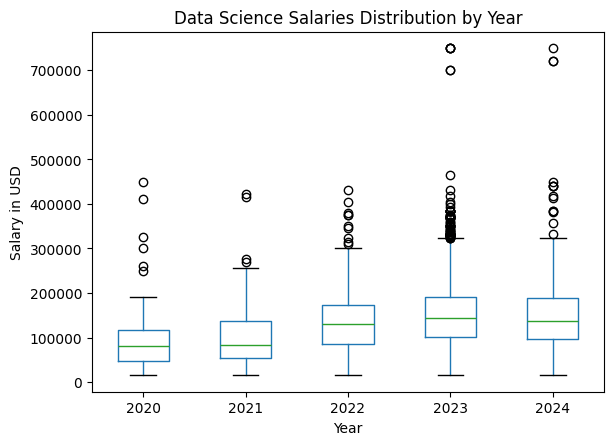

In [135]:
# Box plot
plt.figure(figsize=(10, 6))
data_science_salaries_df.boxplot(by='work_year', column='salary_in_usd', grid=False)
plt.title('Data Science Salaries Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.suptitle('')
plt.show()

In [140]:
salary_by_job= data_science_salaries_df.groupby('job_title')['salary_in_usd'].mean()
salary_by_job

job_title
AI Architect                       232058.600000
AI Developer                       141140.888889
AI Engineer                        162616.250000
AI Product Manager                 120000.000000
AI Programmer                       67382.333333
                                       ...      
Sales Data Analyst                  60000.000000
Software Data Engineer             111627.666667
Staff Data Analyst                  79917.000000
Staff Data Scientist               134500.000000
Staff Machine Learning Engineer    185000.000000
Name: salary_in_usd, Length: 132, dtype: float64

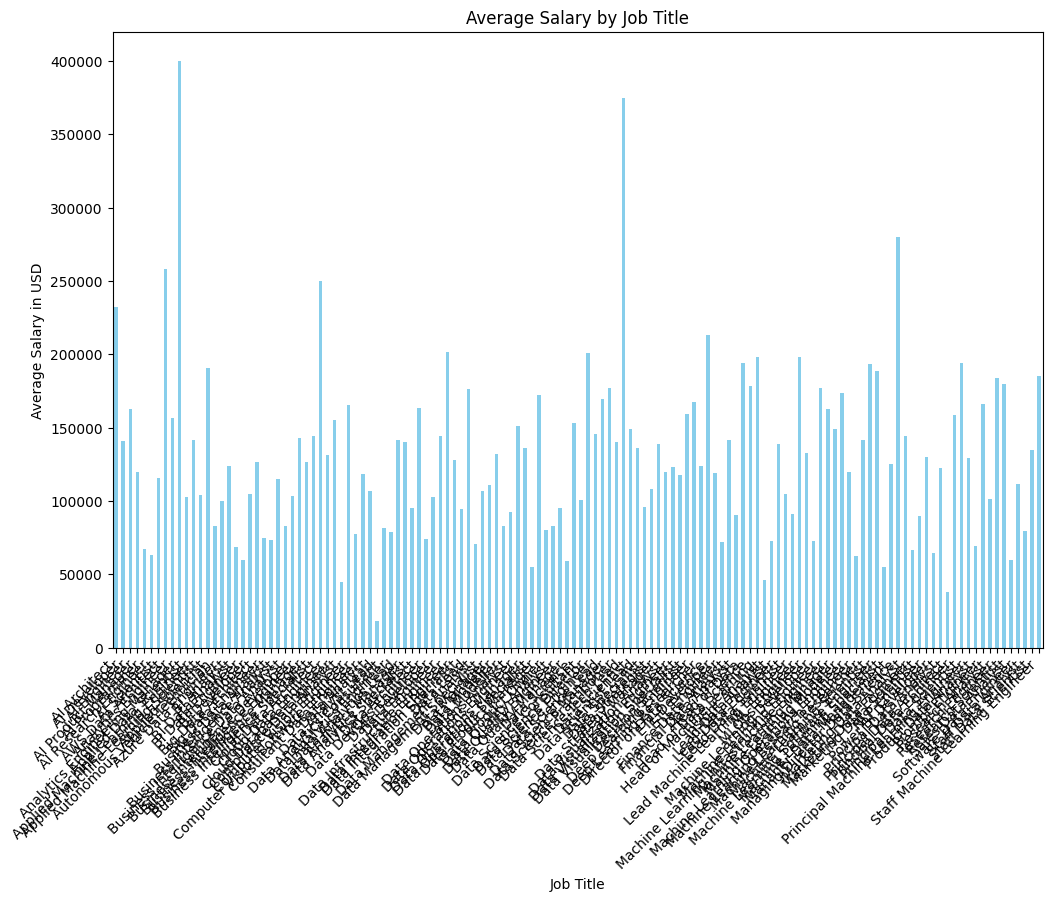

In [141]:
plt.figure(figsize=(12, 8))
salary_by_job.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')  
plt.show()

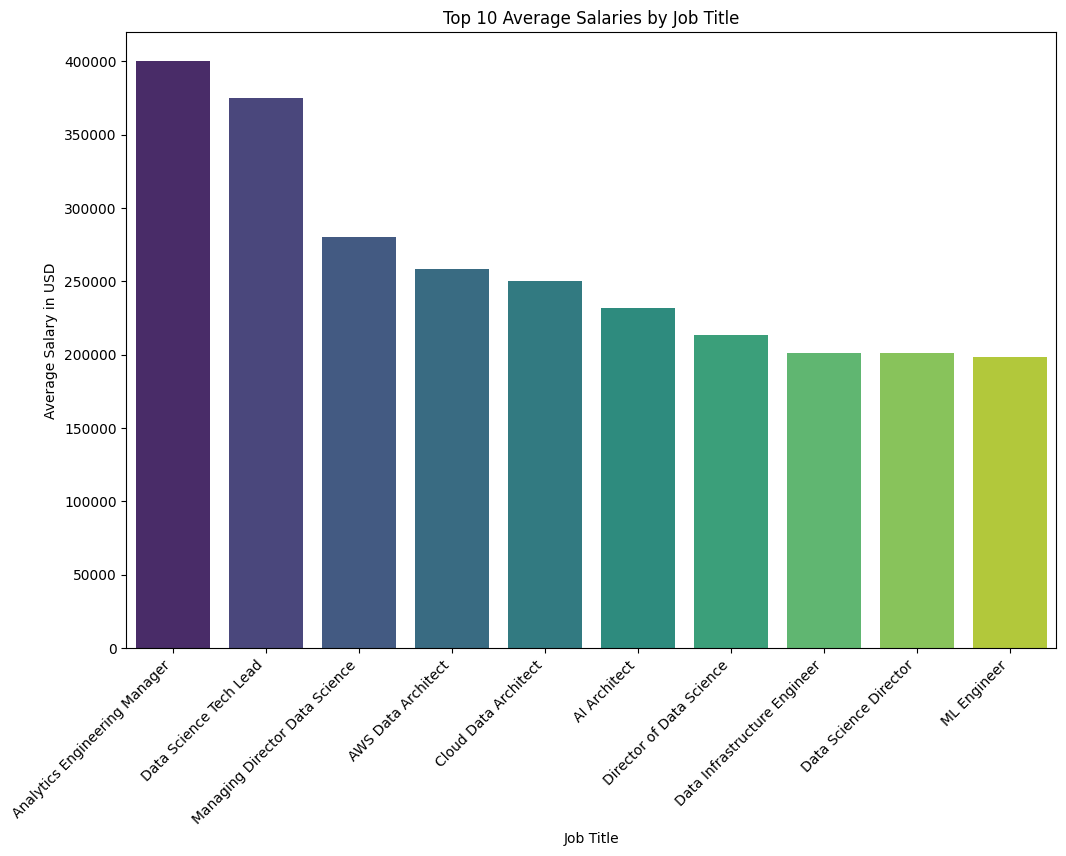

In [160]:
# 
grouped_data = data_science_salaries_df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Select top Number job titles based on mean salary
top_num = 10  
top_jobs = grouped_data.nlargest(top_num, 'salary_in_usd')

# Plot a bar chart for the top Number job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='salary_in_usd', hue='job_title', data=top_jobs, palette='viridis', legend=False)
plt.title(f'Top {top_num} Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


## Mean Salary Versus Exeperience

